In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
mlip_list = ['omni-omat24', 'omni-matpes_r2scan', 'omni-mp_r2scan', 'omni-pet_mad']
df = pd.read_csv('rta_exp.csv')

In [3]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica','Arial']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlelocation'] = 'right'
plt.rcParams['axes.titlepad'] = 5

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.labelbottom'] = True    
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 0.5

plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.facecolor'] = 'white'

plt.rcParams['figure.figsize'] = 3.4, 2.5
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.subplot.bottom'] = 0.18
plt.rcParams['figure.subplot.left'] = 0.1
plt.rcParams['figure.subplot.right'] = 0.97
plt.rcParams['figure.subplot.top'] = 0.98
plt.rcParams['figure.subplot.wspace'] = 0.03
plt.rcParams['figure.subplot.hspace'] = 0.03


In [59]:
df['Togo, 2015'] = df['togo']
df_wz = df[df['spg_num'] == 186]
df_zb = df[df['spg_num'] == 216]
df

,name,spg_num,exp,togo,omni-omat24,omni-matpes_r2scan,omni-mp_r2scan,omni-pet_mad,"Togo, 2015"
0,SiC,186,490.00,340.333333,431.317157,407.517356,397.395115,361.329724,340.333333
1,BeO,186,370.00,284.333333,276.866805,354.964560,338.409069,280.049411,284.333333
2,CdS,186,16.00,16.833333,11.465658,17.276136,16.172530,17.392985,16.833333
3,AgI,186,1.03,1.513333,1.515078,1.090851,0.986085,2.071054,1.513333
4,ZnO,186,60.00,45.866667,49.696003,53.851538,51.607998,52.224832,45.866667
5,CuBr,186,1.25,2.116667,2.193058,3.085334,2.499492,4.297723,2.116667
6,CuI,186,1.68,6.163333,6.807939,3.937685,4.834822,7.392915,6.163333
7,CuCl,186,0.84,1.233333,1.135718,1.505651,1.251393,1.755014,1.233333
8,GaN,186,210.00,165.333333,181.775517,207.547407,183.771414,191.003468,165.333333
9,AlN,186,350.00,218.333333,239.220066,266.013717,240.922706,246.119091,218.333333


In [57]:
def plot(mlip):

    fig, ax = plt.subplots(figsize=(6.5,6.5))
    ax.plot([0.1, 2*10**3], [0.1, 2*10**3], color='gray', linestyle='--' ,linewidth=1, zorder=0)

    for i in range(len(df_wz)):
        ax.scatter(df_wz.iloc[i]['exp'], df_wz.iloc[i][mlip], marker='^', s=300, edgecolors='k', linewidths=1.1, alpha = 0.8)
    for i in range(len(df_zb)):
        ax.scatter(df_zb.iloc[i]['exp'], df_zb.iloc[i][mlip], marker='s', s=230, edgecolors='k', linewidths=1.1, alpha = 0.8)
        
    r2 = r2_score(df['exp'], df[mlip])
    mae = mean_absolute_error(df['exp'], df[mlip])
    ax.text(0.04, 0.96, mlip, transform=ax.transAxes, fontsize=20,
            verticalalignment='top', horizontalalignment='left')
    ax.text(0.04, 0.90, f'R$^2$={r2:.2f}\nMAE={mae:.2f}', transform=ax.transAxes, fontsize=18,
            verticalalignment='top', horizontalalignment='left',)


    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r"κ experiment (W/m$\cdot$K)")
    ax.set_ylabel(r"κ MLIP (W/m$\cdot$K)")
    ax.set_xlim(0.4, 2*10**3)
    ax.set_ylim(0.4, 2*10**3)
    # ax.legend(frameon=True, fontsize=12,markerscale=1.2, handletextpad=0.3, borderpad=0.5, labelspacing=0.8, bbox_to_anchor=(0.02, 0.98), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'rta_exp_{mlip}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()

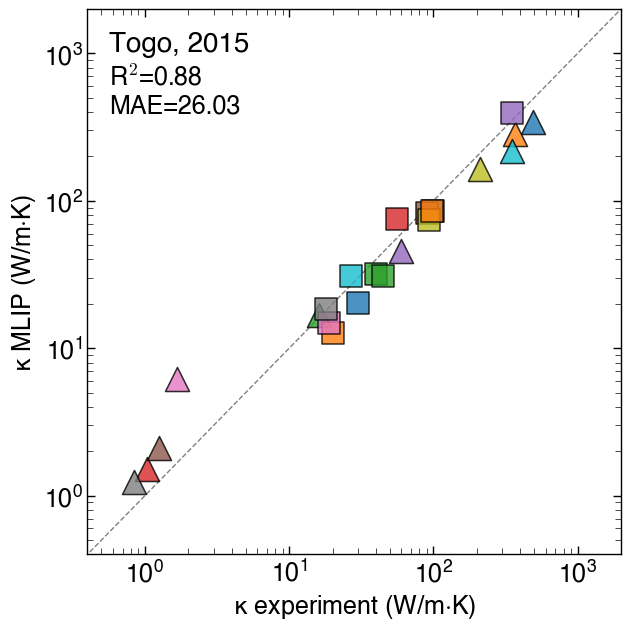

In [60]:
plot('Togo, 2015')

In [55]:
def plot(sgn):

    fig, ax = plt.subplots(figsize=(2,3.5))
    if sgn == 186:
        for i in range(len(df_wz)):
            ax.scatter(df_wz.iloc[i]['exp'], df_wz.iloc[i][mlip], marker='^', s=300, edgecolors='k', linewidths=1.1, alpha = 0.8, label=df_wz.iloc[i]['name'])
    if sgn == 216:
        for i in range(len(df_zb)):
            ax.scatter(df_zb.iloc[i]['exp'], df_zb.iloc[i][mlip], marker='s', s=230, edgecolors='k', linewidths=1.1, alpha = 0.8, label=df_zb.iloc[i]['name'])
    ax.set_xlim(-2,-1)
    ax.set_ylim(-2,-1)
    ax.set_axis_off()    

    ax.legend(fontsize=15,markerscale=1.1, handletextpad=0.2, borderpad=0.5, labelspacing=0.5, ncol = 1, frameon=False)
    plt.tight_layout()
    plt.savefig(f'rta_exp_{sgn}.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

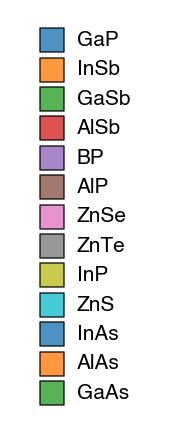

In [56]:
plot(216)